In [1]:
from attackcti import attack_client
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
plt.style.use('ggplot')

In [2]:
lift = attack_client()
ICS_TECHNIQUES = lift.get_ics_techniques()
print("Techniques Count:",len(ICS_TECHNIQUES))

Techniques Count: 81


In [3]:
data_sources = []
for TECHNIQUE in ICS_TECHNIQUES:
    if 'x_mitre_data_sources' in TECHNIQUE:
        data_sources += TECHNIQUE['x_mitre_data_sources']

In [4]:
counter = Counter(data_sources)
counter

Counter({'Alarm history': 9,
         'Alarm thresholds': 1,
         'Network protocol analysis': 36,
         'Packet capture': 39,
         'Sequential event recorder': 14,
         'Data historian': 4,
         'Netflow/Enclave netflow': 8,
         'Authentication logs': 5,
         'Windows event logs': 3,
         'Web logs': 1,
         'Web application firewall logs': 1,
         'Application logs': 4,
         'File monitoring': 14,
         'Windows registry': 2,
         'API monitoring': 7,
         'File Monitoring': 1,
         'Process monitoring': 20,
         'Binary file metadata': 3,
         'Controller program': 7,
         'Network device logs': 4,
         'Host network interfaces': 2,
         'Process use of network': 4,
         'Process command-line parameters': 10,
         'Alarm History': 3,
         'Sequential Event Recorder': 1,
         'process use of network': 1,
         'Web proxy': 2,
         'SSl/TLS inspection': 1,
         'Network intrusion 

In [5]:
df = pd.DataFrame.from_dict(counter, orient='index').reset_index()
df.columns= ["Data Source", "Occurences"]

In [6]:
tmp = df.sort_values("Occurences", ascending=False)

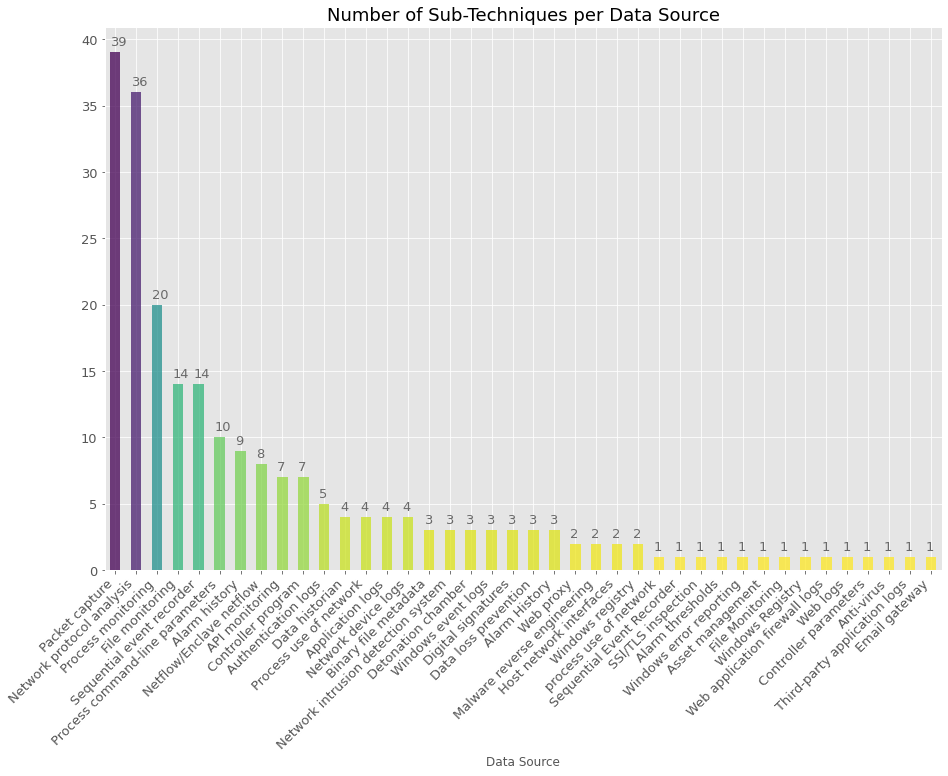

In [7]:
# https://matplotlib.org/tutorials/colors/colormaps.html
# https://stackoverflow.com/questions/64068659/bar-chart-in-matplotlib-using-a-colormap   
# rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
cmap = plt.get_cmap("viridis_r")
rescale = lambda y: (y - np.min(tmp["Occurences"])) / (np.max(tmp["Occurences"]) - np.min(tmp["Occurences"]))

ax = tmp.head(40).plot(kind='bar', x="Data Source", y="Occurences", alpha=0.75,
                       rot=0, figsize=(15,10), color=cmap(rescale(tmp["Occurences"])), fontsize=13)
ax.set_title("Number of Sub-Techniques per Data Source", fontsize=18)
plt.xticks(rotation=45, ha='right')
ax.legend_.remove()
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

for i in ax.patches:
    value = str(round(i.get_height(),2))
    ax.text(i.get_x(), i.get_height()+0.5, value, fontsize=13, color="dimgrey")

In [8]:
top10 = list(tmp["Data Source"].head(10))
top10

['Packet capture',
 'Network protocol analysis',
 'Process monitoring',
 'File monitoring',
 'Sequential event recorder',
 'Process command-line parameters',
 'Alarm history',
 'Netflow/Enclave netflow',
 'API monitoring',
 'Controller program']

In [9]:
techniques = {}
for TECHNIQUE in ICS_TECHNIQUES:
    if 'x_mitre_data_sources' in TECHNIQUE:
        for ds in top10:
            if ds in TECHNIQUE['x_mitre_data_sources']:
                techniques[ds] = techniques.get(ds, []) + [f"{TECHNIQUE['external_references'][0]['external_id']}-{TECHNIQUE['name']}"]
techniques

{'Packet capture': ['T0878-Alarm Suppression',
  'T0806-Brute Force I/O',
  'T0808-Control Device Identification',
  'T0812-Default Credentials',
  'T0870-Detect Program State',
  'T0819-Exploit Public-Facing Application',
  'T0825-Location Identification',
  'T0843-Program Download',
  'T0856-Spoof Reporting Message',
  'T0855-Unauthorized Command Message',
  'T0803-Block Command Message',
  'T0807-Command-Line Interface',
  'T0814-Denial of Service',
  'T0817-Drive-by Compromise',
  'T0833-Modify Control Logic',
  'T0841-Network Service Scanning',
  'T0845-Program Upload',
  'T0848-Rogue Master Device',
  'T0854-Serial Connection Enumeration',
  'T0858-Utilize/Change Operating Mode',
  'T0804-Block Reporting Message',
  'T0836-Modify Parameter',
  'T0850-Role Identification',
  'T0857-System Firmware',
  'T0875-Change Program State',
  'T0816-Device Restart/Shutdown',
  'T0830-Man in the Middle',
  'T0838-Modify Alarm Settings',
  'T0869-Standard Application Layer Protocol',
  'T0800

In [10]:
techniques['Packet capture']

['T0878-Alarm Suppression',
 'T0806-Brute Force I/O',
 'T0808-Control Device Identification',
 'T0812-Default Credentials',
 'T0870-Detect Program State',
 'T0819-Exploit Public-Facing Application',
 'T0825-Location Identification',
 'T0843-Program Download',
 'T0856-Spoof Reporting Message',
 'T0855-Unauthorized Command Message',
 'T0803-Block Command Message',
 'T0807-Command-Line Interface',
 'T0814-Denial of Service',
 'T0817-Drive-by Compromise',
 'T0833-Modify Control Logic',
 'T0841-Network Service Scanning',
 'T0845-Program Upload',
 'T0848-Rogue Master Device',
 'T0854-Serial Connection Enumeration',
 'T0858-Utilize/Change Operating Mode',
 'T0804-Block Reporting Message',
 'T0836-Modify Parameter',
 'T0850-Role Identification',
 'T0857-System Firmware',
 'T0875-Change Program State',
 'T0816-Device Restart/Shutdown',
 'T0830-Man in the Middle',
 'T0838-Modify Alarm Settings',
 'T0869-Standard Application Layer Protocol',
 'T0800-Activate Firmware Update Mode',
 'T0805-Block S

In [19]:
techniques['Network protocol analysis']

['T0878-Alarm Suppression',
 'T0806-Brute Force I/O',
 'T0808-Control Device Identification',
 'T0812-Default Credentials',
 'T0870-Detect Program State',
 'T0825-Location Identification',
 'T0843-Program Download',
 'T0846-Remote System Discovery',
 'T0856-Spoof Reporting Message',
 'T0855-Unauthorized Command Message',
 'T0803-Block Command Message',
 'T0807-Command-Line Interface',
 'T0814-Denial of Service',
 'T0833-Modify Control Logic',
 'T0841-Network Service Scanning',
 'T0845-Program Upload',
 'T0848-Rogue Master Device',
 'T0854-Serial Connection Enumeration',
 'T0858-Utilize/Change Operating Mode',
 'T0804-Block Reporting Message',
 'T0836-Modify Parameter',
 'T0850-Role Identification',
 'T0857-System Firmware',
 'T0875-Change Program State',
 'T0816-Device Restart/Shutdown',
 'T0838-Modify Alarm Settings',
 'T0869-Standard Application Layer Protocol',
 'T0800-Activate Firmware Update Mode',
 'T0805-Block Serial COM',
 'T0884-Connection Proxy',
 'T0868-Detect Operating Mode

In [18]:
contributors = []
for TECHNIQUE in ICS_TECHNIQUES:
    if 'x_mitre_contributors' in TECHNIQUE:
            contributors +=  [f"{TECHNIQUE['x_mitre_contributors']}--{TECHNIQUE['external_references'][0]['external_id']}-{TECHNIQUE['name']}"]
contributors

["['Marina Krotofil', 'Jos Wetzels - Midnight Blue']--T0878-Alarm Suppression",
 "['Joe Slowik - Dragos']--T0843-Program Download",
 "['Matan Dobrushin - Otorio']--T0809-Data Destruction",
 "['Dragos Threat Intelligence']--T0827-Loss of Control",
 "['Matan Dobrushin - Otorio']--T0885-Commonly Used Port",
 "['Joe Slowik - Dragos']--T0810-Data Historian Compromise",
 "['Joe Slowik - Dragos']--T0818-Engineering Workstation Compromise",
 "['Conrad Layne - GE Digital']--T0830-Man in the Middle",
 "['Joe Slowik - Dragos']--T0800-Activate Firmware Update Mode",
 "['Jos Wetzels - Midnight Blue']--T0861-Point & Tag Identification",
 "['Scott Dougherty']--T0860-Wireless Compromise"]

In [12]:
ICS_TECHNIQUES[0]['x_mitre_contributors']

['Marina Krotofil', 'Jos Wetzels - Midnight Blue']